In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os 
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    path_list = natsort.natsorted(path_list)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "IID partition", 
                                                                0.3: "Non-IID partition (α=0.3)"})
    return data_temp

In [3]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        if "LN" in path: continue
        if "WD" in path: continue
        if "FCs" in path: continue
        if "G1" in path: continue
        if "Mean" in path: continue
        if "gs1" in path: continue
        if "gs2" in path: continue
        if "gs3" in path: continue
        if "gs5" in path: continue
        if "gs6" in path: continue
        if "gs7" in path: continue
        if "gs8" in path: continue

        if "gs" in path: continue        
        if "hs" in path: continue
        if "Mask" in path: continue
        if "Mask" in path: continue
        if "LR001" in path: continue
        
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]
        data["Scaling"] = "vanilla"

        # if "__Route" in path: data["Scaling"] = str(path.split("Route")[1][:3])
        if "__Route" in path: 
            try:
                a = int(path.split("Route")[1][:4])
                # print(a)
                data["Scaling"] = str(path.split("Route")[1][:4])
            except:
                data["Scaling"] = str(path.split("Route")[1][:3])

        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

## CIFAR100

/tmp/ipykernel_89109/312335211.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
/tmp/ipykernel_89109/312335211.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


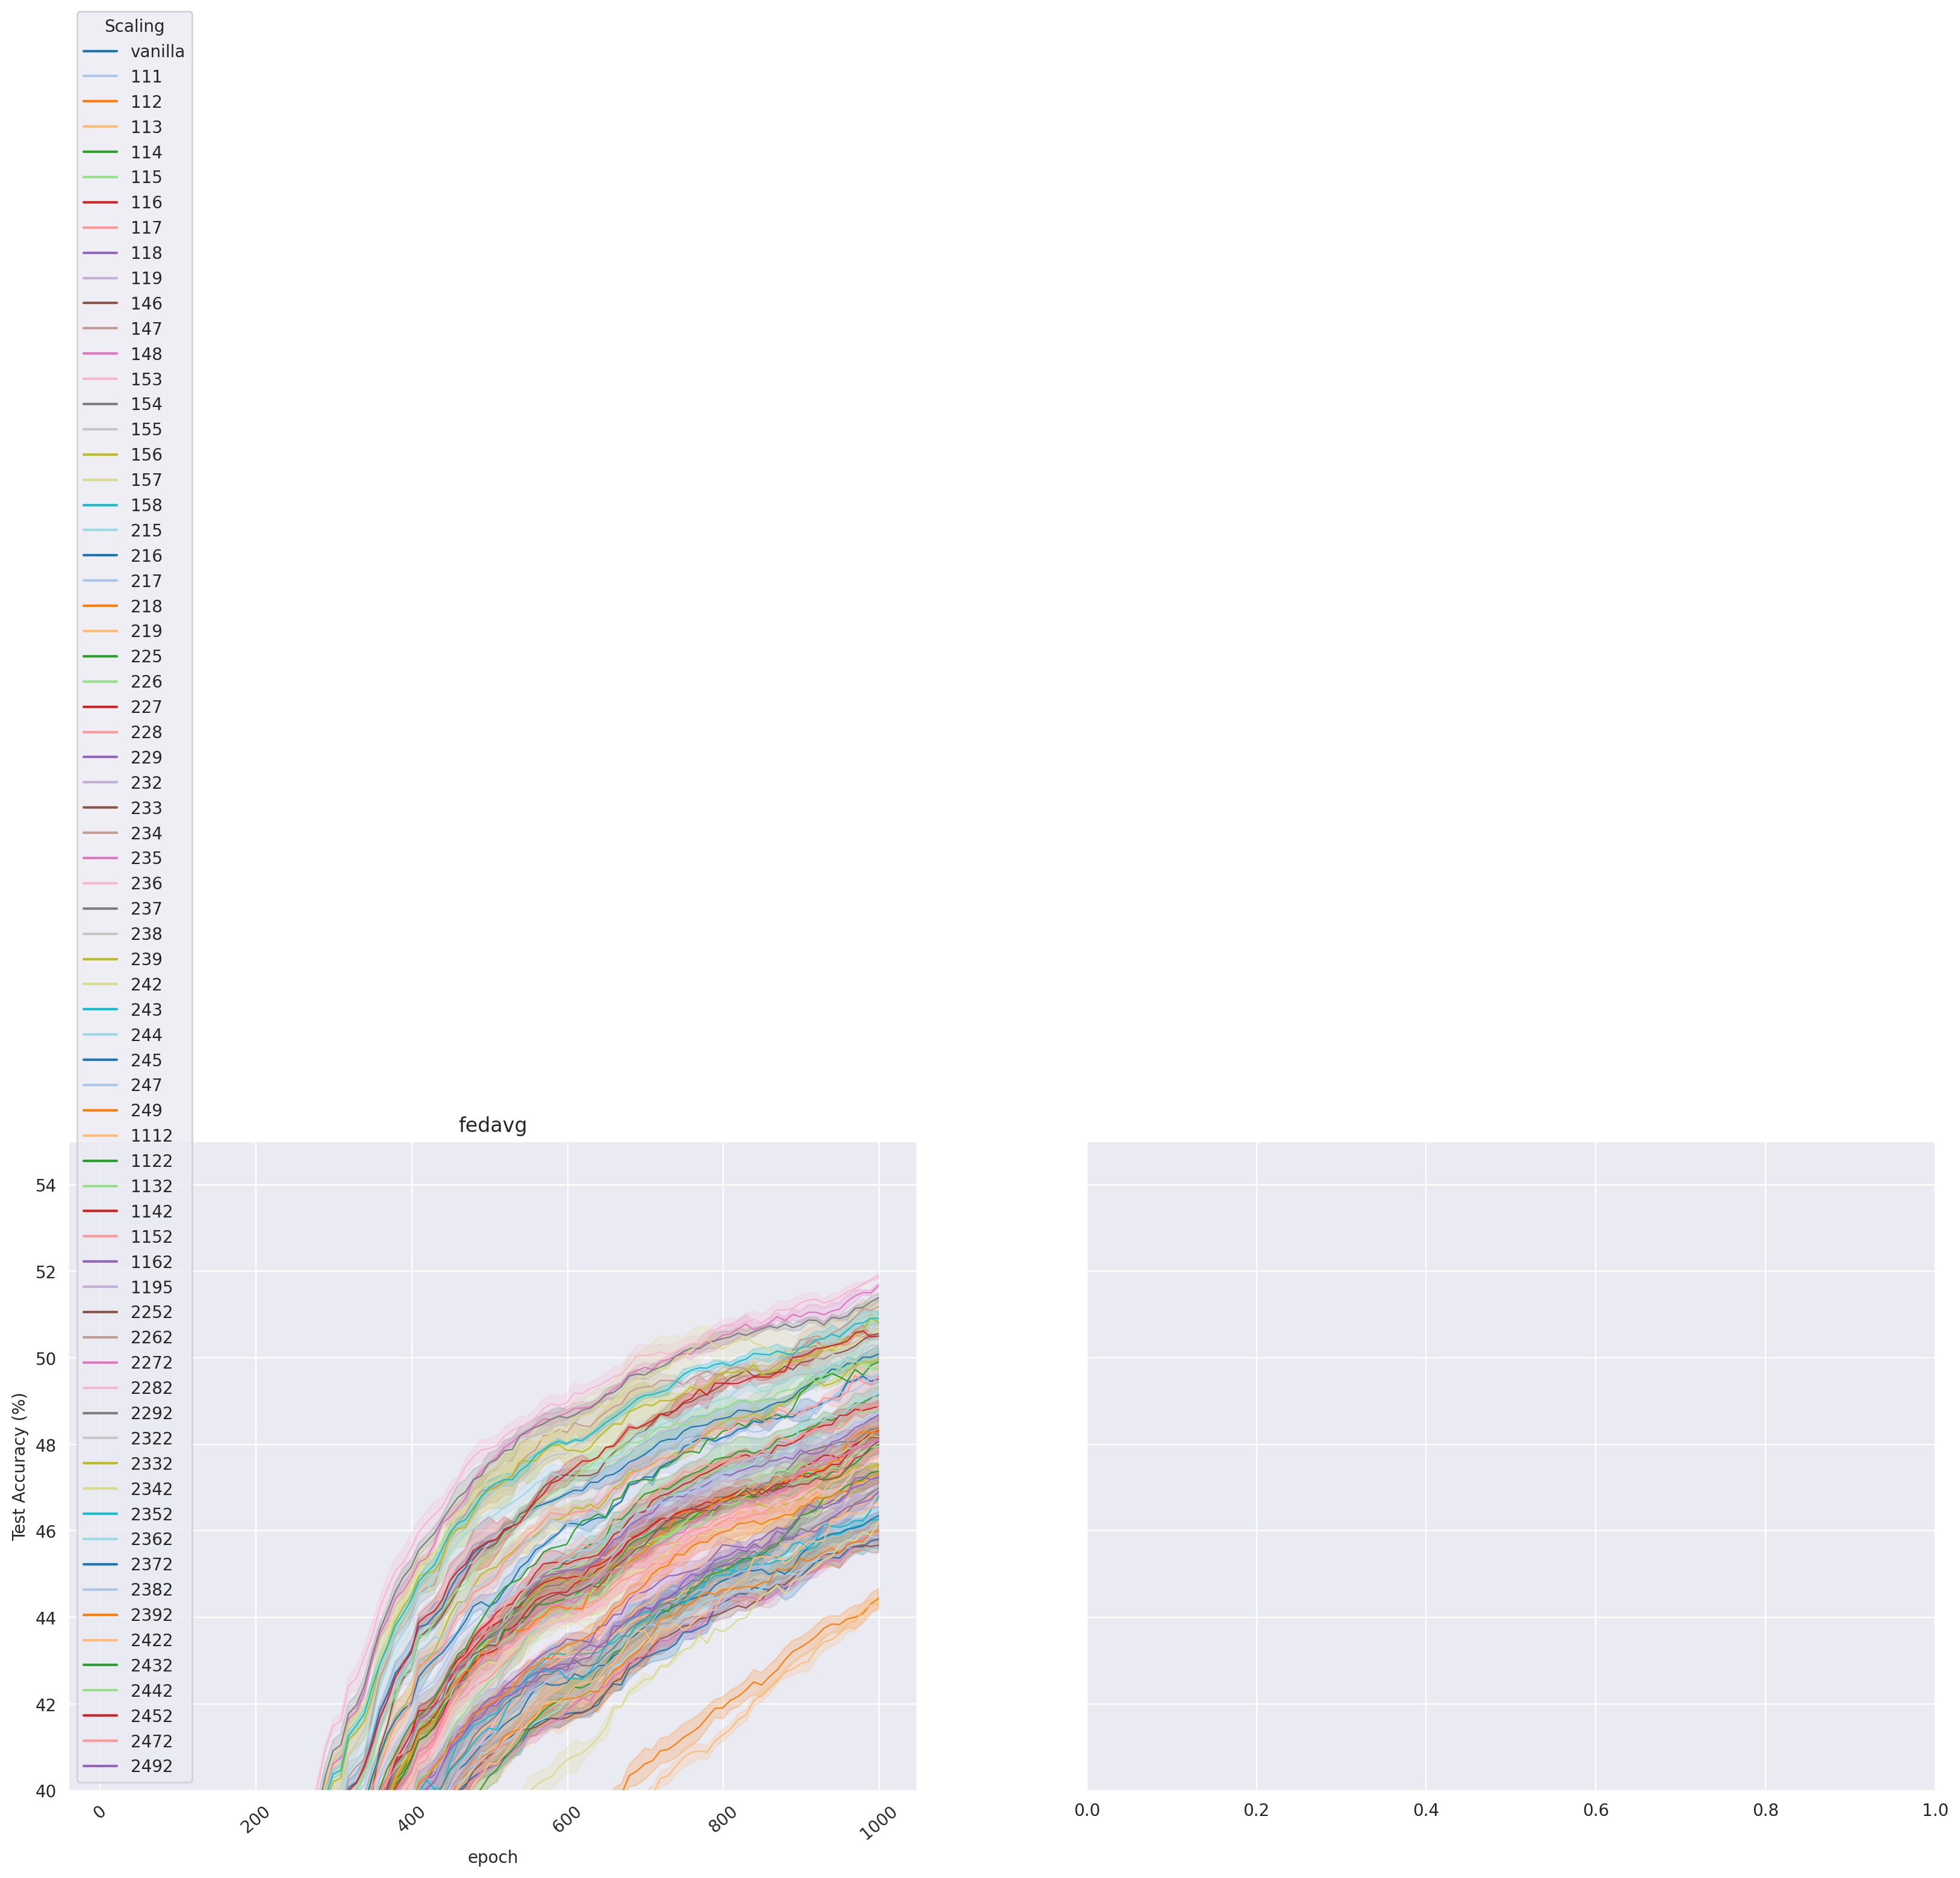

In [15]:
data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
data_temp3 = load_data("../Output_route/CIFAR100-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        # ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab20", errorbar="se", linewidth = 0.8)
        ax.set_ylim([40, 55])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        break
    fig.tight_layout()
    plt.pause(0.1)

/tmp/ipykernel_89109/4186306410.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)


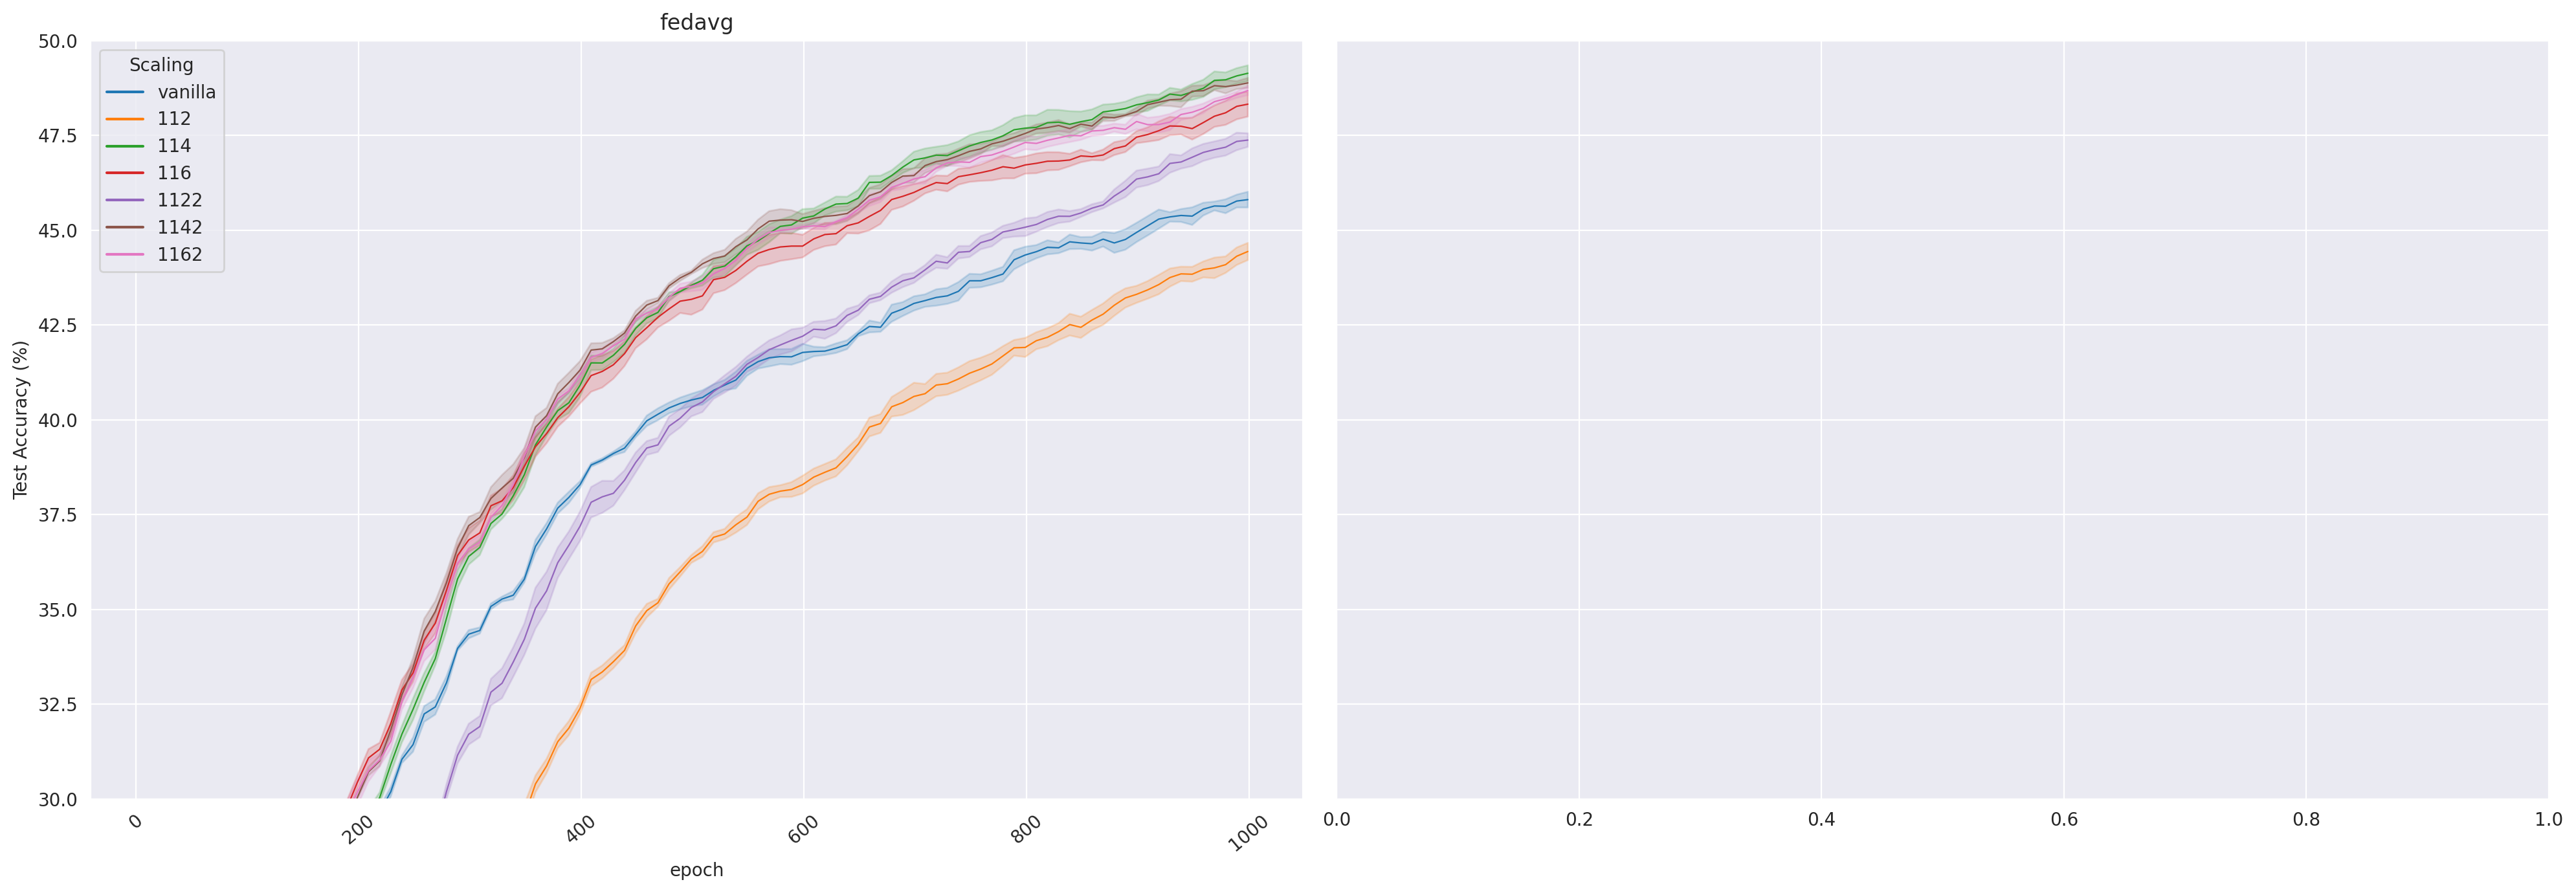

In [12]:
for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        sk = ["vanilla", 
              "112", "114", "116", 
              "1122", "1142", "1162", 
              # "1172", "1182", "1192"
              # "112", "114", "116", "119",
              # "146", "148", "156", "158",
              # "215", "217", "219", "225", "227", "229", 
             
             ]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([30, 50])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        break
    fig.tight_layout()
    plt.pause(0.1)

/tmp/ipykernel_89109/2454066403.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)


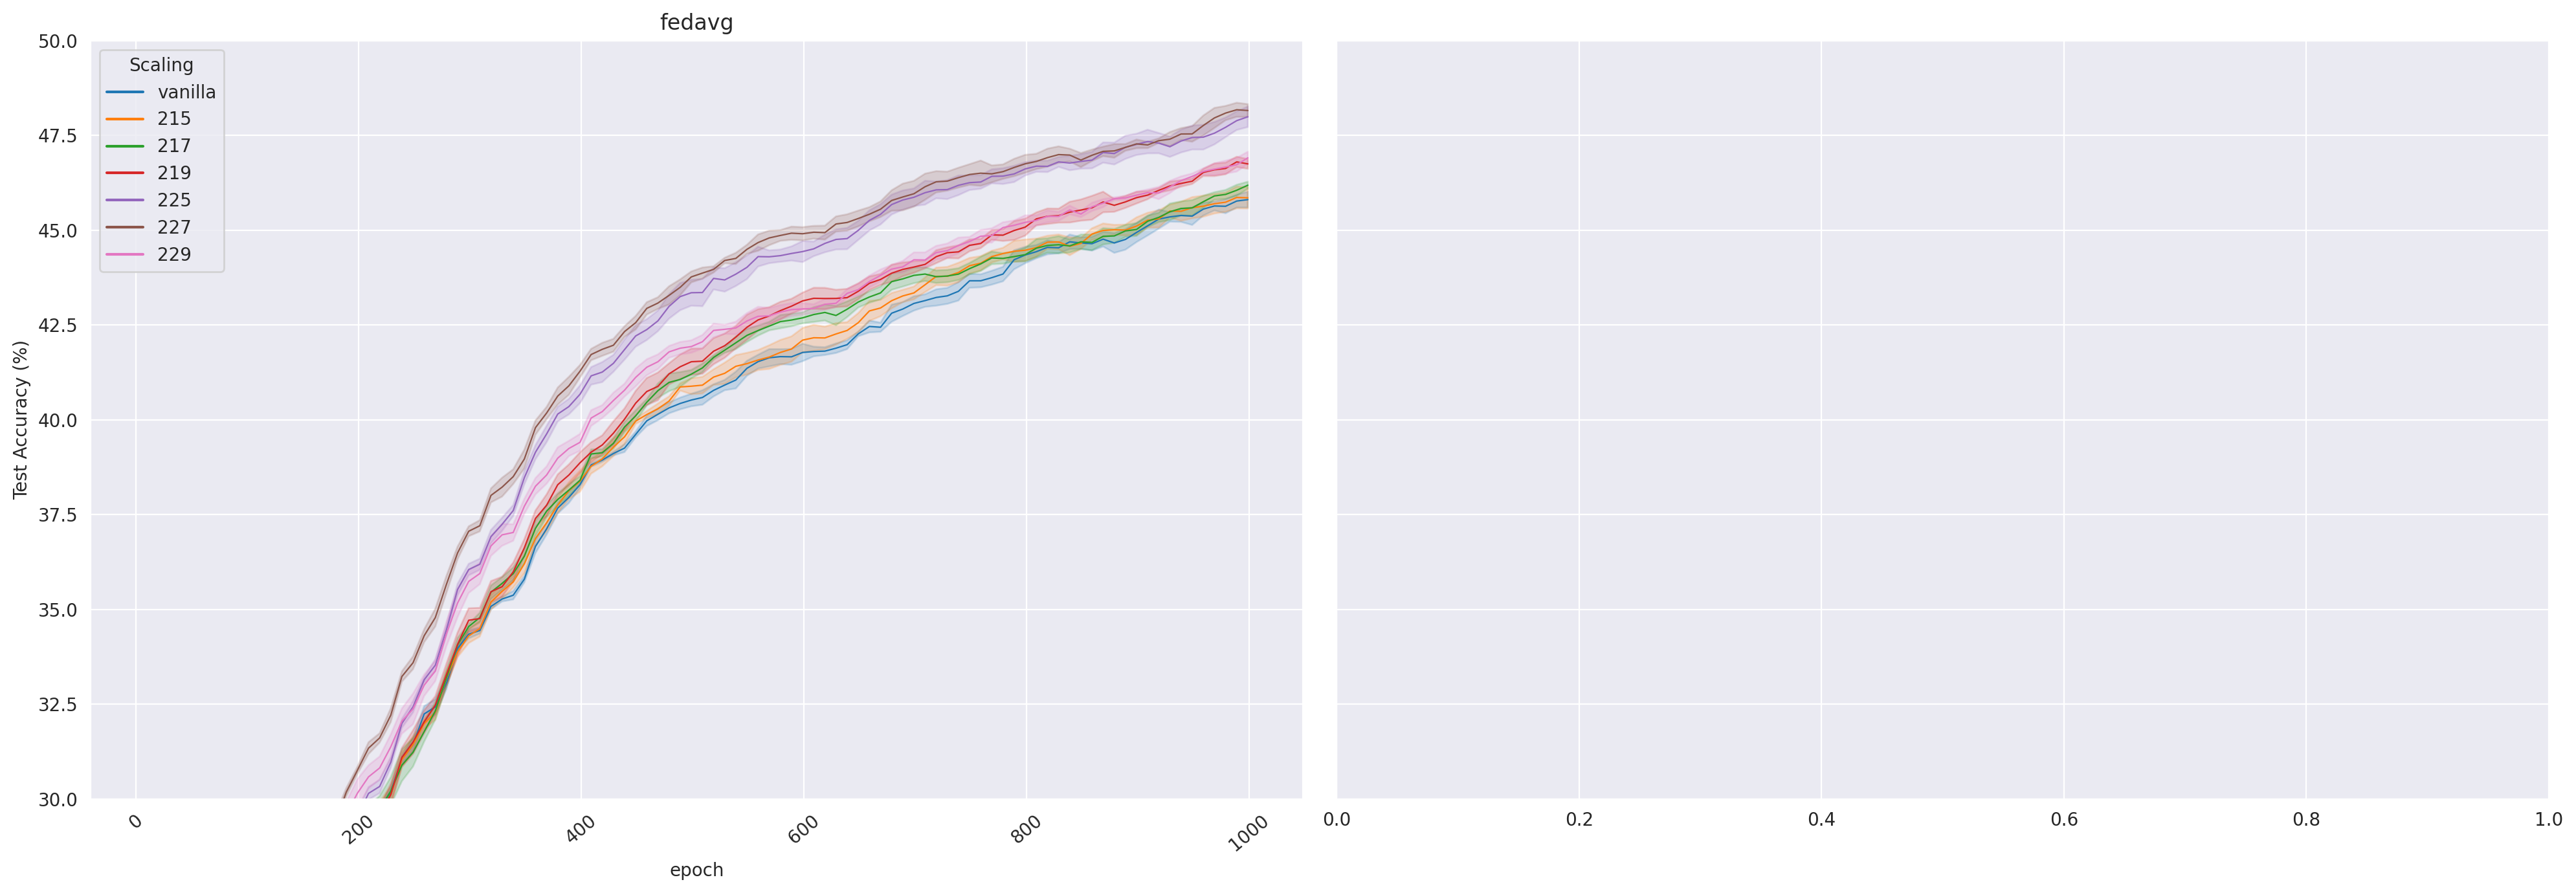

In [7]:
for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        sk = ["vanilla", 
              # "112", "113", "114", "115", "116", "117", "118", "119"
              # "112", "114", "116", "119",
              # "146", "148", "156", "158",
              "215", "217", "219", "225", "227", "229", 
             
             ]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([30, 50])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        break
    fig.tight_layout()
    plt.pause(0.1)

/tmp/ipykernel_89109/2727022654.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)


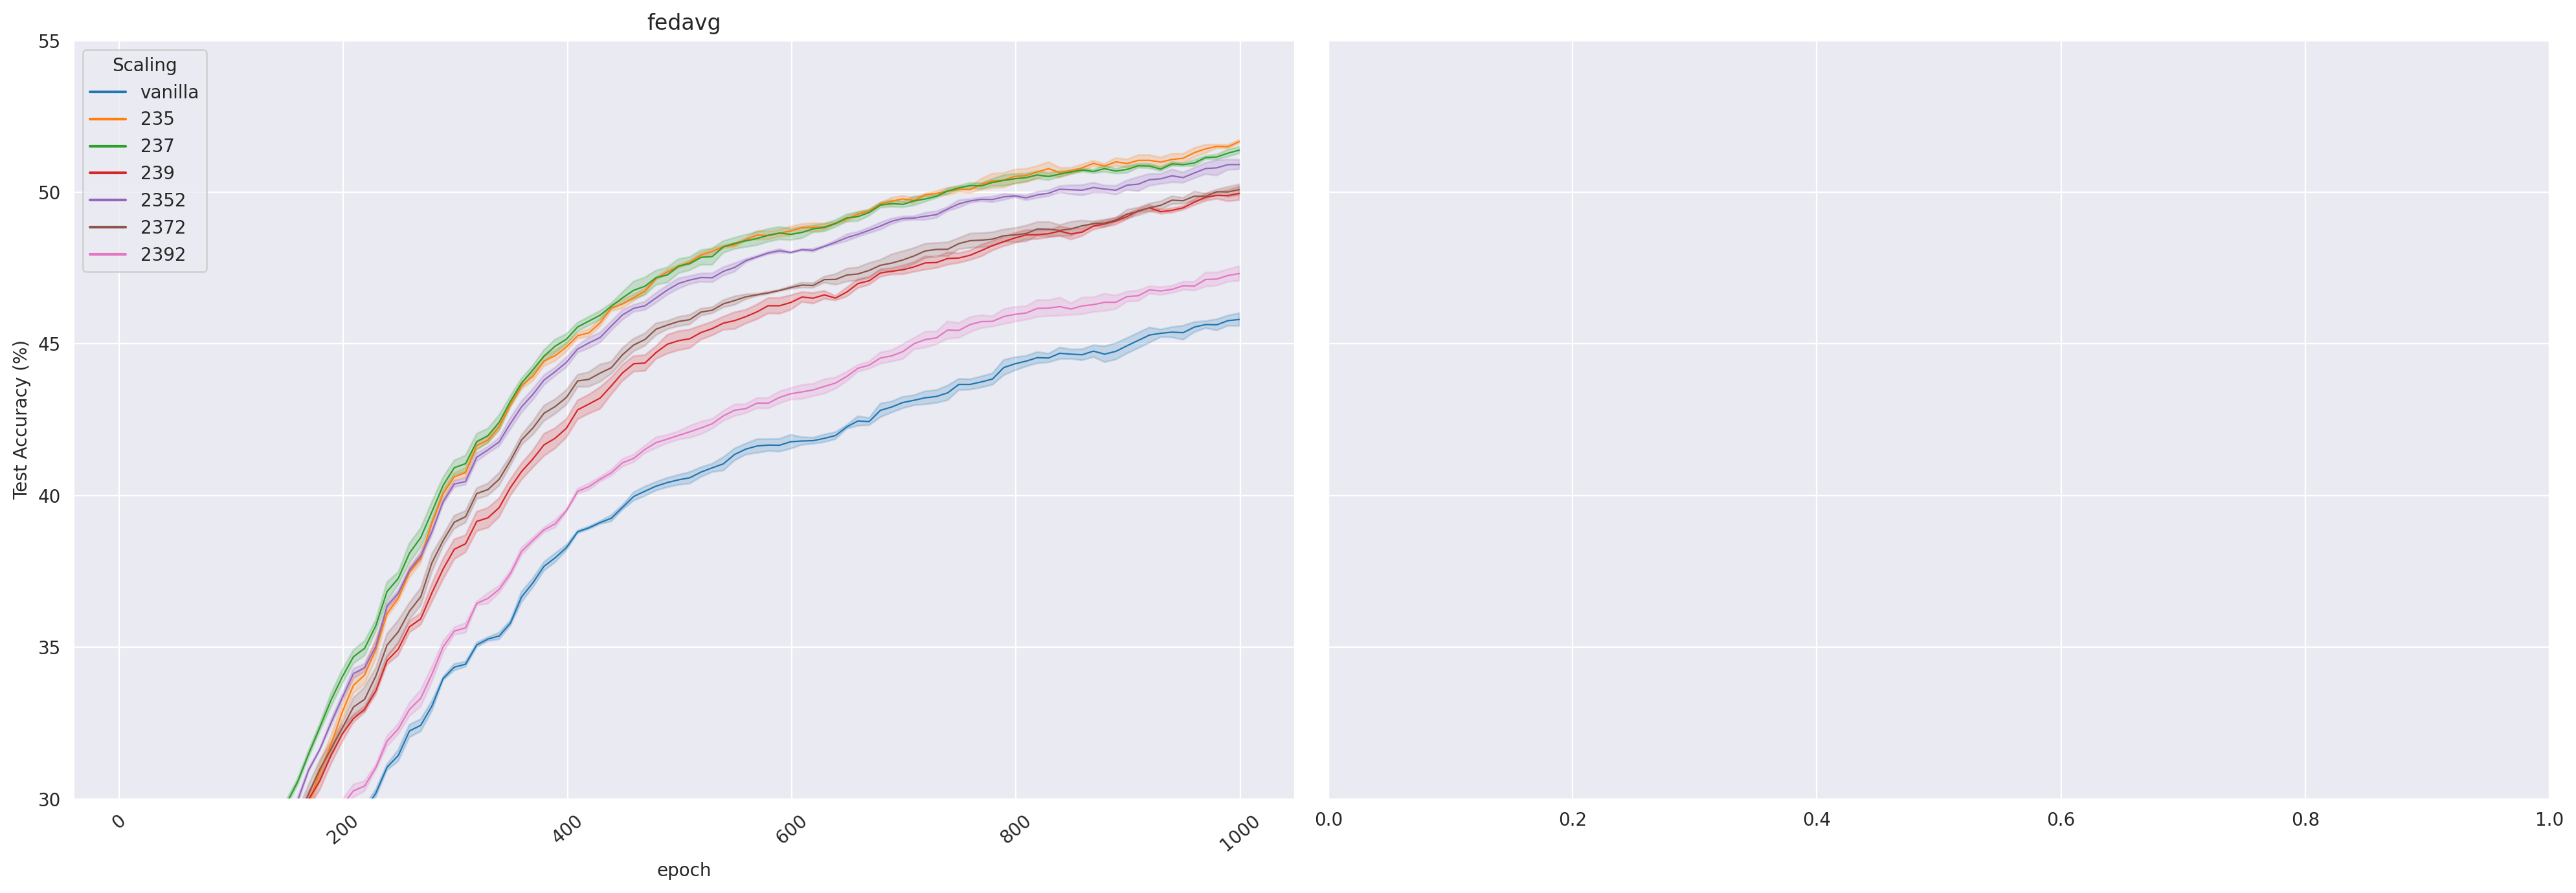

In [8]:
for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        sk = ["vanilla", 
              # "112", "113", "114", "115", "116", "117",
              # "118", "119",
              # "1112", "1122", "1132", "1142", "1152", "1162", 
              # "117", "118", "119",
              # "112", "114", "116", "119",
              # "146", "148", "156", "158",

              # "215", "217", "219", 
              # "225", "227", "229", 
              "235", "237", "239",
              # "2252", "2272", "2292", 
              "2352", "2372", "2392",
             ]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([30, 55])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        break
    fig.tight_layout()
    plt.pause(0.1)

/tmp/ipykernel_89109/427576697.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)


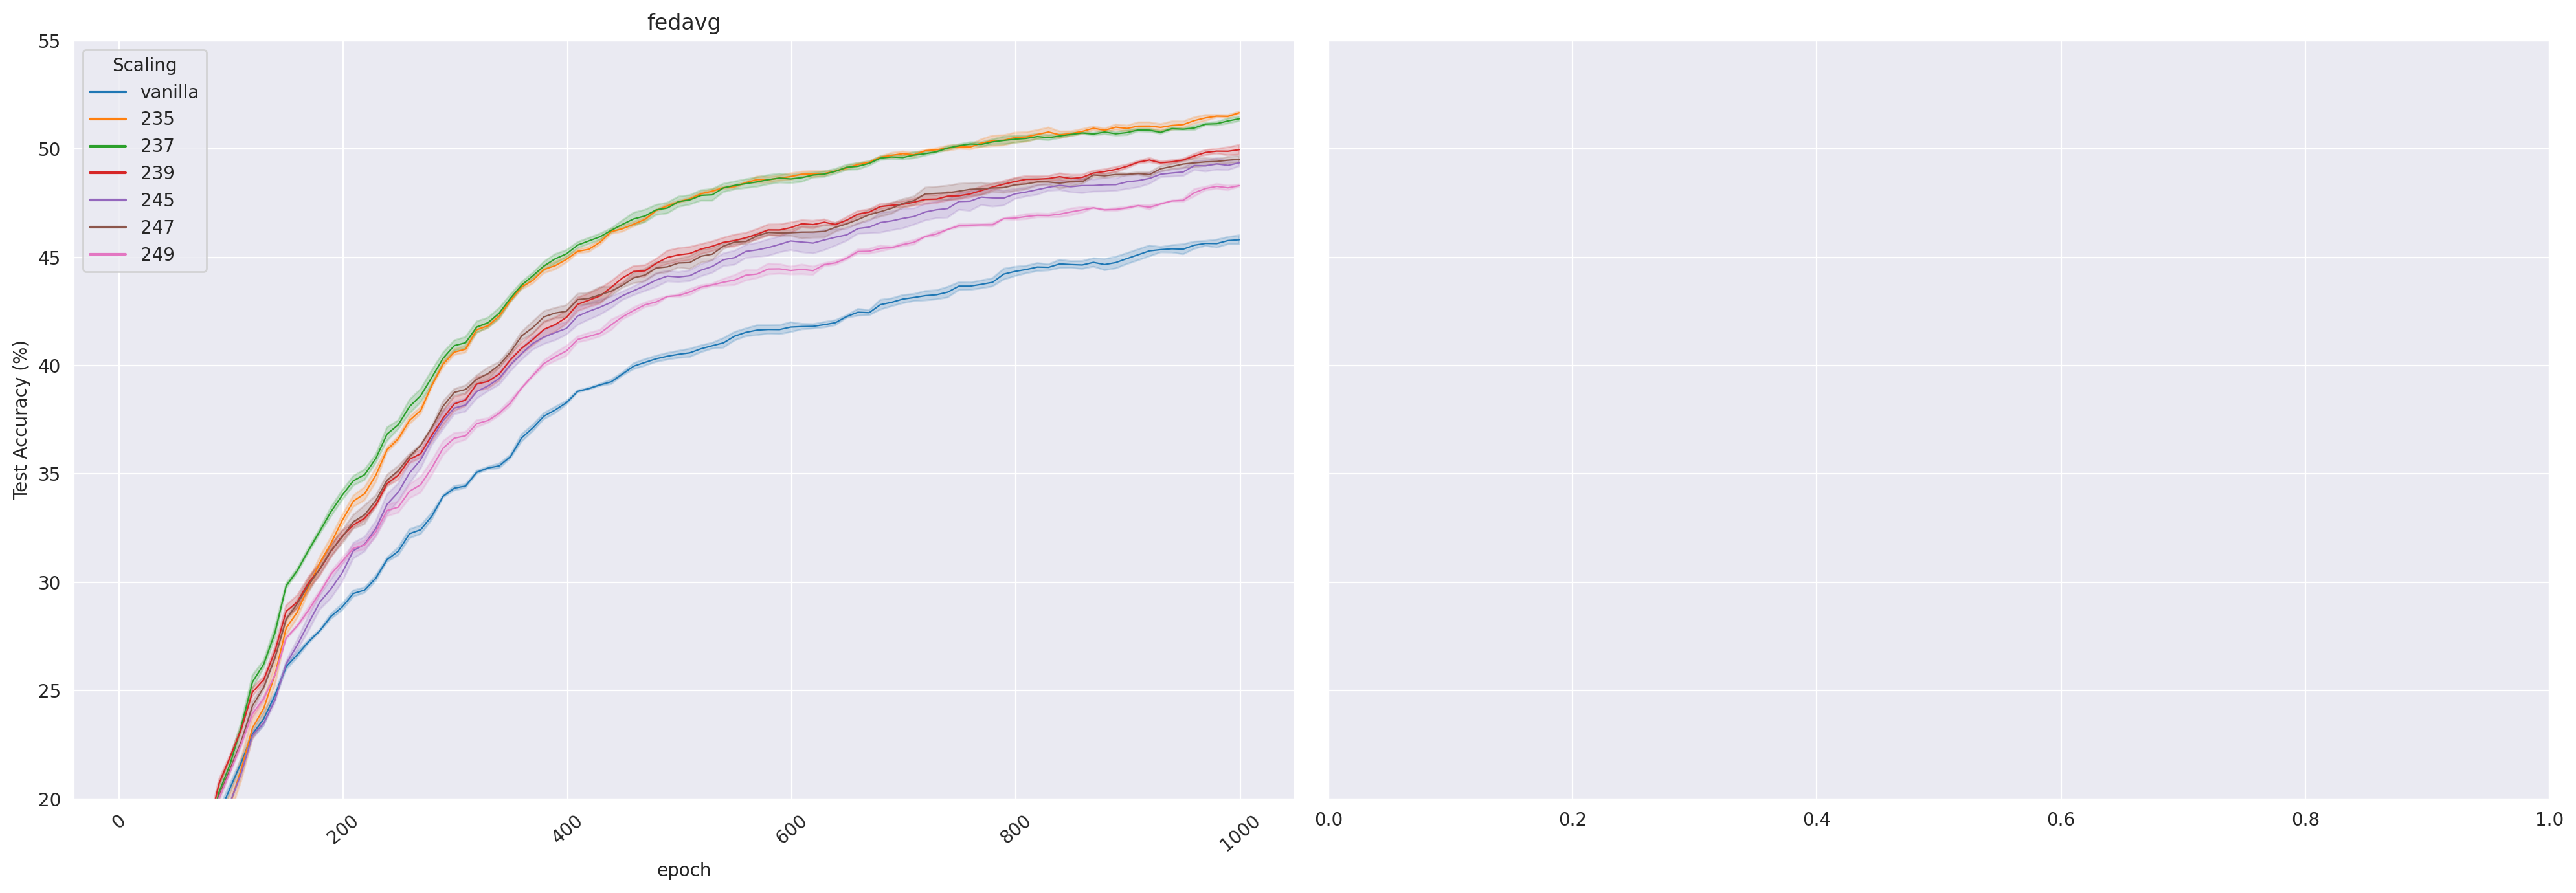

In [34]:
for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        sk = ["vanilla", 
              # "112", "113", "114", "115", "116", "117",
              # "118", "119",
              # "1112", "1122", "1132", "1142", "1152", "1162", 
              # "117", "118", "119",
              # "112", "114", "116", "119",
              # "146", "148", "156", "158",

              # "215", "217", "219", 
              # "225", "227", "229", 
              "235", "237", "239",
            #   "2352", "2372", "2392",
              "245", "247", "249",
            #   "2452", "2472", "2492",
             ]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([20, 55])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        break
    fig.tight_layout()
    plt.pause(0.1)

In [33]:
a = np.array([0,1,2,3,4,5,6])
p = np.random.choice([0,1,2,3,4])
p = 4
a[-p:] = 1
a

array([0, 1, 2, 1, 1, 1, 1])

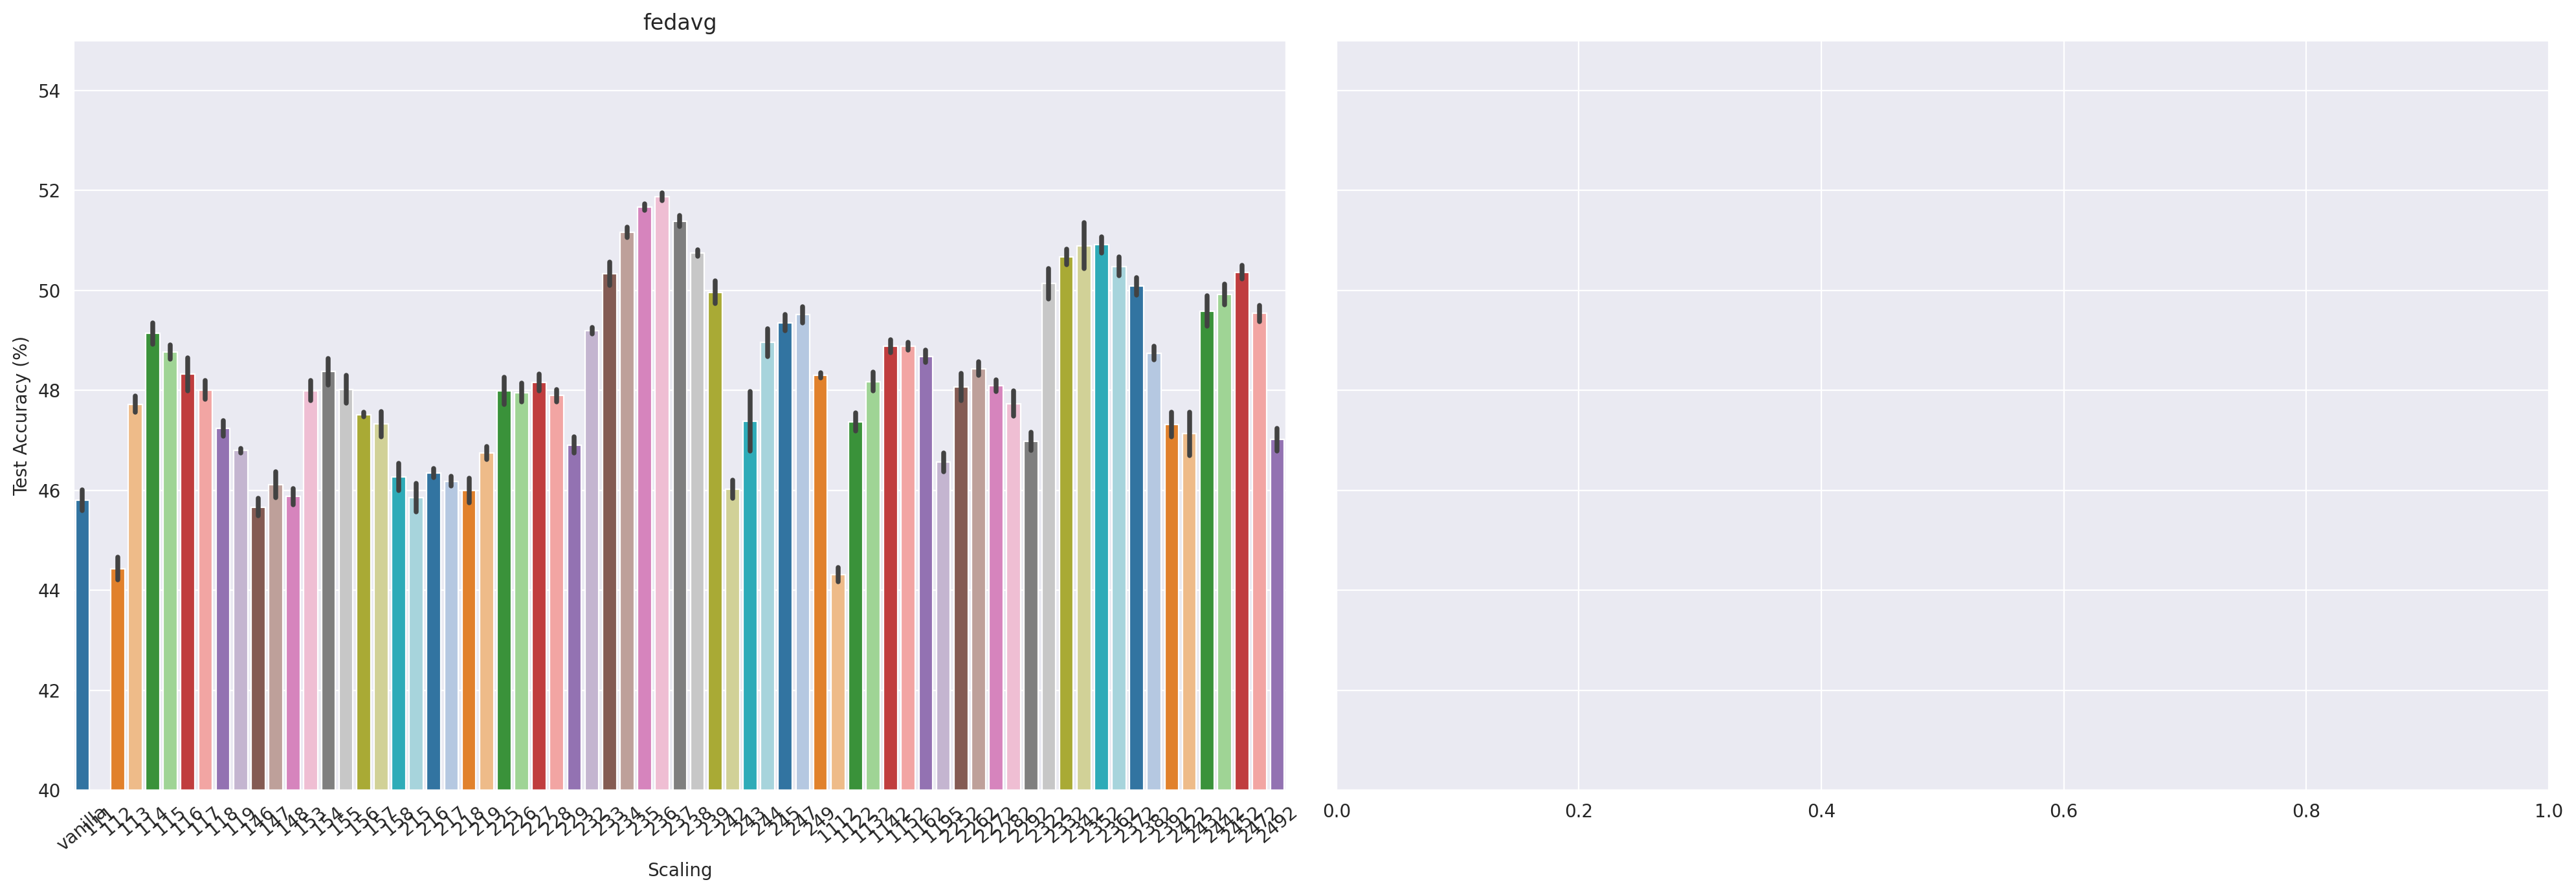

In [25]:
data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
data_temp3 = load_data("../Output_route/CIFAR100-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab20", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab20", errorbar="se", linewidth = 0.8)
        ax.set_ylim([40, 55])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        break
    fig.tight_layout()
    plt.pause(0.1)

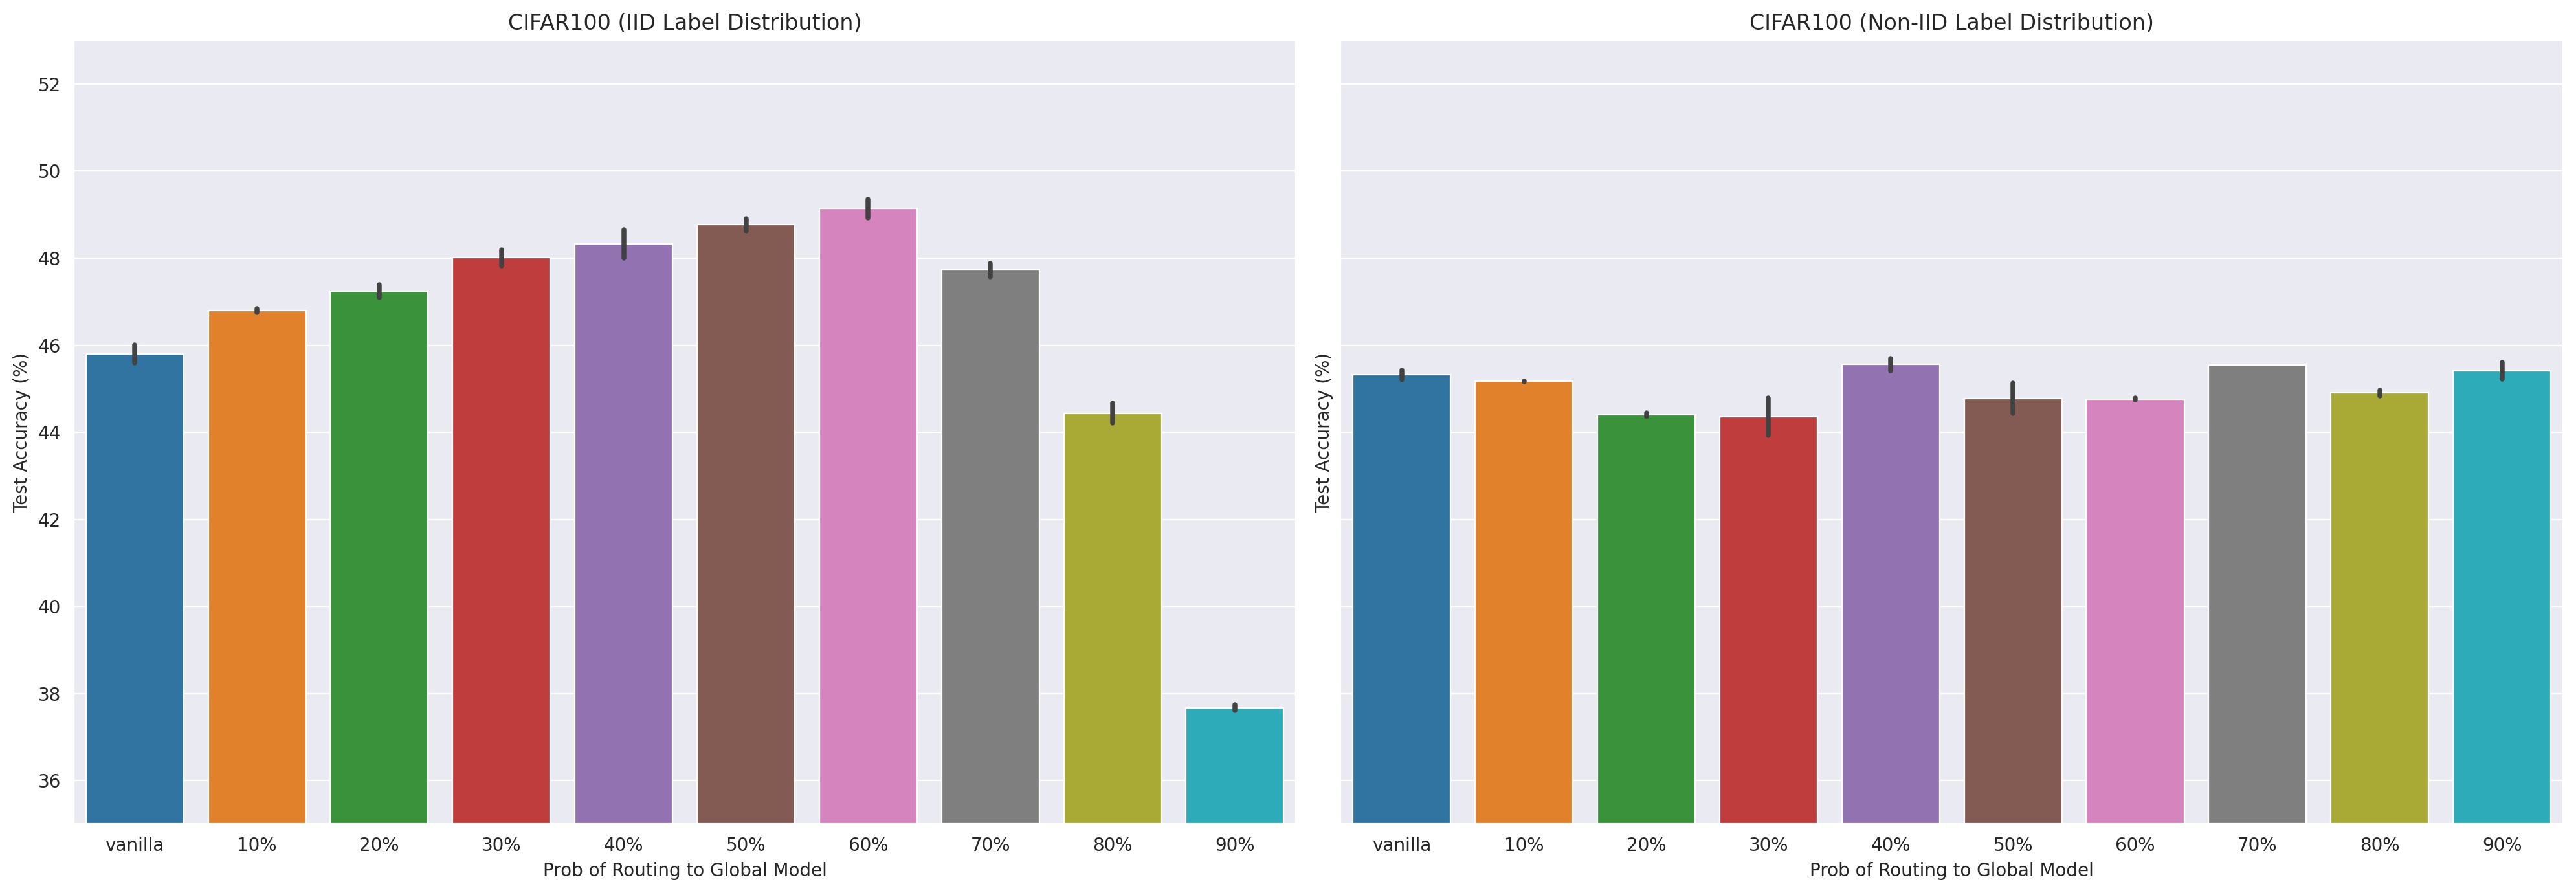

In [43]:
# data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
# data_temp3 = load_data("../Output_route/CIFAR100-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        sk = ["vanilla", "119", "118", "117", "116", "115", "114", "113", "112", "111"]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": 
                         {"111": "90%", 
                          "112": "80%", 
                          "113": "70%", 
                          "114": "60%", 
                          "115": "50%", 
                          "116": "40%", 
                          "117": "30%", 
                          "118": "20%", 
                          "119": "10%"}
                     })
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([35, 53])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Prob of Routing to Global Model")
        if iid == 0.: ax.set_title("CIFAR100 (IID Label Distribution)")
        elif iid == 0.3: ax.set_title("CIFAR100 (Non-IID Label Distribution)")
        
        # ax.set_xlabel("# communications")
        # ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        # break
    fig.tight_layout()
    plt.pause(0.1)

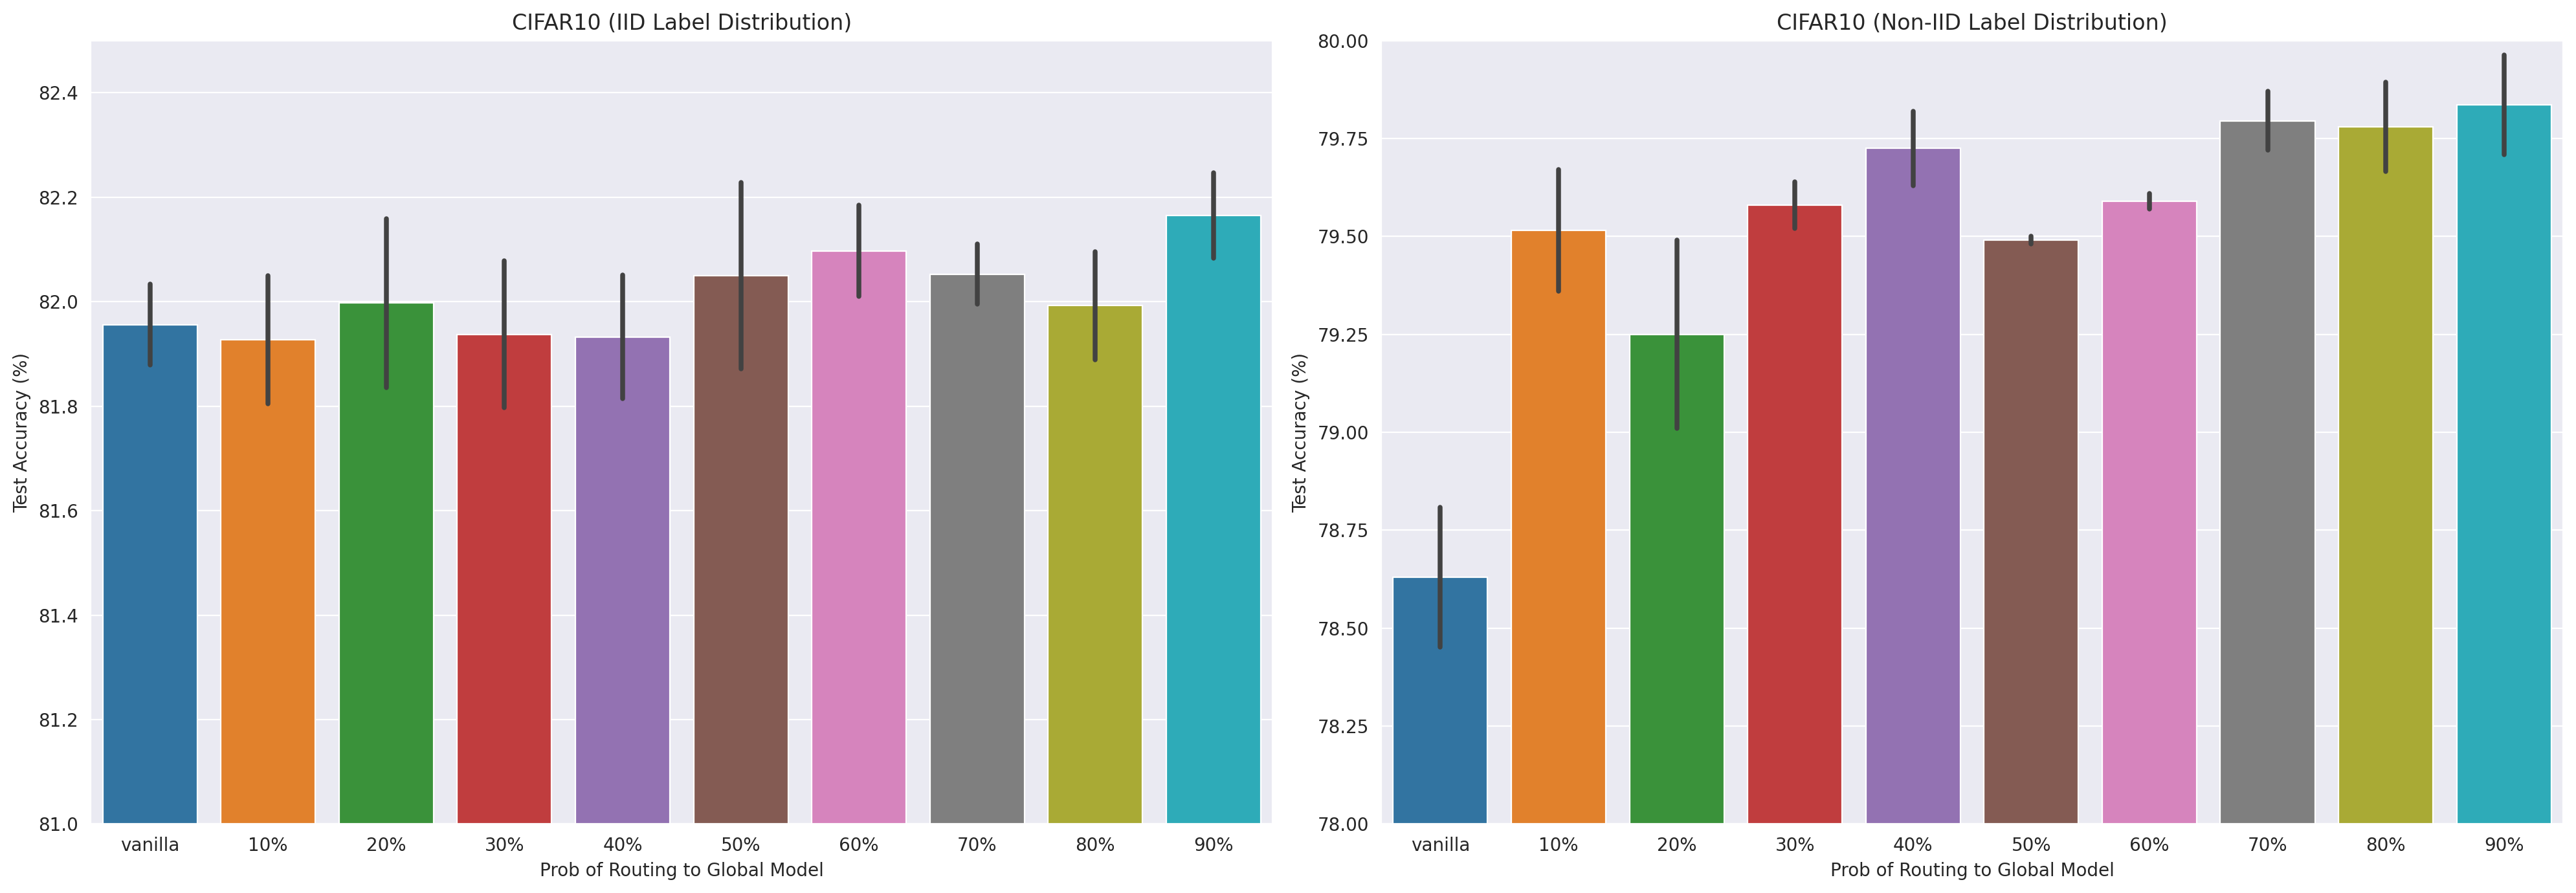

In [49]:
# data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
# data_temp3 = load_data("../Output_route/CIFAR100-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp3])

data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])
data_temp3 = load_data("../Output_route/CIFAR10-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp3])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi=200, sharey=False)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        # temp = temp[temp["epoch"] <= 999]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        
        sk = ["vanilla", "119", "118", "117", "116", "115", "114", "113", "112", "111"]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        
        temp = temp.replace({"Scaling": 
                         {"111": "90%", 
                          "112": "80%", 
                          "113": "70%", 
                          "114": "60%", 
                          "115": "50%", 
                          "116": "40%", 
                          "117": "30%", 
                          "118": "20%", 
                          "119": "10%"}
                     })
        
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        # ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Scaling", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([78, 82.5])
        if iid == 0.: ax.set_ylim([81, 82.5])
        elif iid == 0.3: ax.set_ylim([78, 80])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_xlabel("Prob of Routing to Global Model")
        if iid == 0.: ax.set_title("CIFAR10 (IID Label Distribution)")
        elif iid == 0.3: ax.set_title("CIFAR10 (Non-IID Label Distribution)")
        # ax.set_xlabel("# communications")
        # ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
        # break
    fig.tight_layout()
    plt.pause(0.1)